In [1]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns

In [2]:
BASE_DATA_FOLDER = "./"
TRAin_DATA_FOLDER = os.path.join(BASE_DATA_FOLDER, "train")

In [3]:
images_per_class = {}
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    images_per_class[class_label] = []
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        images_per_class[class_label].append(image_bgr)


In [4]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

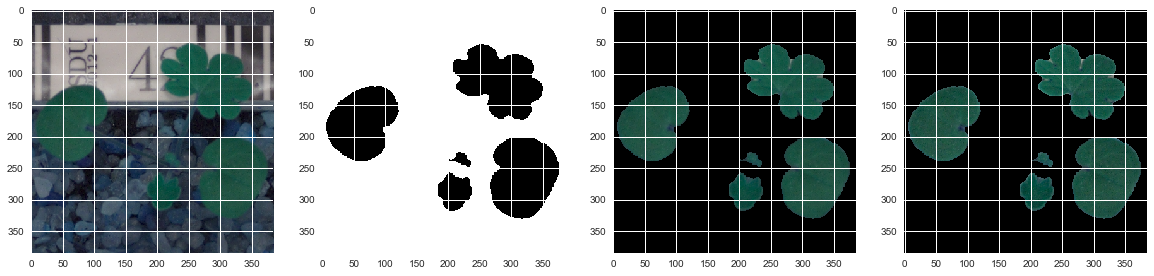

In [5]:
# Test image to see the changes
image = images_per_class["Small-flowered Cranesbill"][97]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

In [6]:
def find_contours(mask_image):
    return cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

def calculate_largest_contour_area(contours):
    if len(contours) == 0:
        return 0
    c = max(contours, key=cv2.contourArea)
    return cv2.contourArea(c)

def calculate_contours_area(contours, min_contour_area = 250):
    area = 0
    for c in contours:
        c_area = cv2.contourArea(c)
        if c_area >= min_contour_area:
            area += c_area
    return area

In [7]:
areas = []
larges_contour_areas = []
labels = []
nb_of_contours = []
images_height = []
images_width = []

for class_label in images_per_class.keys():
    for image in images_per_class[class_label]:
        mask = create_mask_for_plant(image)
        contours = find_contours(mask)
        
        area = calculate_contours_area(contours)
        largest_area = calculate_largest_contour_area(contours)
        height, width, channels = image.shape
        
        images_height.append(height)
        images_width.append(width)
        areas.append(area)
        nb_of_contours.append(len(contours))
        larges_contour_areas.append(largest_area)
        labels.append(class_label)

In [8]:
features_df = pd.DataFrame()
features_df["label"] = labels
features_df["area"] = areas
features_df["largest_area"] = larges_contour_areas
features_df["number_of_components"] = nb_of_contours
features_df["height"] = images_height
features_df["width"] = images_width

In [9]:
features_df.head()

,label,area,largest_area,number_of_components,height,width
0,Cleavers,56497.0,31553.0,4,531,531
1,Cleavers,28110.5,15820.5,2,352,352
2,Cleavers,23247.0,10769.5,3,373,373
3,Cleavers,7251.0,3525.5,3,187,187
4,Cleavers,12918.0,7962.0,3,210,210


In [10]:
features_df.shape

(4750, 6)

# test data process

In [11]:
images_per_test = {}
class_folder_name = 'test'
class_folder_path = os.path.join(TRAin_DATA_FOLDER)

In [12]:
class_folder_path

'./train'

In [13]:
class_label = class_folder_name

In [14]:
class_label

'test'

In [15]:
images_per_test[class_label] = []

In [16]:
images_per_test

{'test': []}

In [17]:
glob(class_folder_path)

['./train']

In [18]:
images_per_test = {}
class_folder_name = 'test'

images_per_test[class_label] = []



In [19]:
class_folder_path = './test'

In [20]:
glob(os.path.join(class_folder_path, "*.png"))

['./test/1b490196c.png',
 './test/85431c075.png',
 './test/506347cfe.png',
 './test/7f46a71db.png',
 './test/668c1007c.png',
 './test/71f5323c5.png',
 './test/1f3f44563.png',
 './test/beebe5f4e.png',
 './test/780defa2e.png',
 './test/df521c0c0.png',
 './test/466bb6d3b.png',
 './test/98d819587.png',
 './test/223e4af09.png',
 './test/abc331628.png',
 './test/eef131644.png',
 './test/b7a7f6390.png',
 './test/7d3045fc3.png',
 './test/1926e82fd.png',
 './test/a9d2eab61.png',
 './test/bffc08672.png',
 './test/6dd095129.png',
 './test/6db684fff.png',
 './test/cec5bf198.png',
 './test/bea23d9f8.png',
 './test/48d97c645.png',
 './test/31f3dd81f.png',
 './test/5b63dcc21.png',
 './test/b4c3df835.png',
 './test/3abb502fb.png',
 './test/54b3afd58.png',
 './test/550a8b7e6.png',
 './test/8585f9718.png',
 './test/e478c452c.png',
 './test/25a4c427e.png',
 './test/39b740f7e.png',
 './test/0021e90e4.png',
 './test/9c32a797e.png',
 './test/958bb9e96.png',
 './test/bd789d151.png',
 './test/e19ad6ac9.png',


In [21]:
filename = []
for image_path in glob(os.path.join(class_folder_path, "*.png")):
    image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
    print(image_bgr)
    print(image_path.split('/')[2])
    images_per_test[class_label].append(image_bgr)
    filename.append(image_path.split('/')[2])


[[[ 30  62  87]
  [ 32  61  86]
  [ 36  61  86]
  ..., 
  [107 118 125]
  [106 118 124]
  [107 118 125]]

 [[ 34  63  84]
  [ 36  62  83]
  [ 40  62  84]
  ..., 
  [101 110 119]
  [104 114 121]
  [114 124 131]]

 [[ 46  71  90]
  [ 39  64  83]
  [ 39  62  82]
  ..., 
  [ 78  86 100]
  [ 90  99 109]
  [104 113 122]]

 ..., 
 [[ 40  64  89]
  [ 39  62  86]
  [ 45  67  90]
  ..., 
  [ 55  76 100]
  [ 55  76 100]
  [ 56  77 101]]

 [[ 41  65  87]
  [ 42  65  86]
  [ 43  65  87]
  ..., 
  [ 53  74  98]
  [ 55  76 100]
  [ 56  77 100]]

 [[ 44  68  87]
  [ 45  68  88]
  [ 47  70  89]
  ..., 
  [ 58  79 102]
  [ 58  79 101]
  [ 59  80 102]]]
1b490196c.png
[[[ 50  77  96]
  [ 44  73  91]
  [ 48  76  94]
  ..., 
  [ 89 116 141]
  [ 88 114 140]
  [ 84 109 134]]

 [[ 49  76  95]
  [ 51  78  97]
  [ 50  77  96]
  ..., 
  [ 87 115 140]
  [ 88 115 140]
  [ 78 104 129]]

 [[ 48  74  94]
  [ 45  72  92]
  [ 44  72  91]
  ..., 
  [ 84 112 138]
  [ 80 108 132]
  [ 80 106 128]]

 ..., 
 [[ 44  64  80]
  

[[[ 64  79  96]
  [ 55  70  90]
  [ 48  63  85]
  ..., 
  [ 49  59  75]
  [ 45  56  74]
  [ 43  54  73]]

 [[ 60  75  94]
  [ 52  67  88]
  [ 41  56  80]
  ..., 
  [ 49  60  76]
  [ 45  56  74]
  [ 43  54  74]]

 [[ 55  71  91]
  [ 52  67  89]
  [ 41  57  81]
  ..., 
  [ 46  58  75]
  [ 45  56  75]
  [ 41  52  73]]

 ..., 
 [[ 77  89  97]
  [ 73  84  93]
  [ 73  83  92]
  ..., 
  [ 46  83 111]
  [ 46  83 111]
  [ 48  84 112]]

 [[ 79  90  99]
  [ 77  88  97]
  [ 76  85  95]
  ..., 
  [ 45  82 112]
  [ 44  80 111]
  [ 43  79 111]]

 [[ 79  90  99]
  [ 77  87  97]
  [ 74  82  94]
  ..., 
  [ 40  78 112]
  [ 43  78 112]
  [ 42  77 112]]]
24d78df74.png
[[[ 60  74  92]
  [ 63  77  95]
  [ 64  77  95]
  ..., 
  [ 54  73  95]
  [ 54  74  94]
  [ 59  79  96]]

 [[ 63  76  94]
  [ 68  81  98]
  [ 64  77  94]
  ..., 
  [ 62  82 102]
  [ 69  88 107]
  [ 73  92 109]]

 [[ 64  77  94]
  [ 68  81  98]
  [ 74  87 103]
  ..., 
  [ 82 100 117]
  [ 87 104 120]
  [ 94 111 125]]

 ..., 
 [[110 116 120]
  

[[[45 60 74]
  [39 54 68]
  [35 49 65]
  ..., 
  [27 60 93]
  [22 58 91]
  [23 58 92]]

 [[36 49 66]
  [31 44 61]
  [28 41 58]
  ..., 
  [24 58 91]
  [11 50 84]
  [28 60 94]]

 [[35 47 64]
  [32 43 58]
  [34 45 59]
  ..., 
  [20 53 87]
  [14 51 86]
  [22 56 90]]

 ..., 
 [[34 47 62]
  [32 44 59]
  [30 43 57]
  ..., 
  [34 55 76]
  [38 60 83]
  [36 59 83]]

 [[37 49 63]
  [35 47 61]
  [29 41 55]
  ..., 
  [31 51 70]
  [35 55 76]
  [36 58 79]]

 [[35 47 62]
  [36 48 62]
  [38 49 61]
  ..., 
  [32 49 67]
  [34 52 71]
  [34 54 74]]]
13b9fa92d.png
[[[41 55 65]
  [43 56 66]
  [43 55 66]
  ..., 
  [43 68 87]
  [43 68 86]
  [49 72 89]]

 [[42 53 65]
  [38 49 61]
  [40 50 64]
  ..., 
  [49 71 89]
  [53 74 91]
  [54 74 90]]

 [[38 49 61]
  [41 51 64]
  [40 49 64]
  ..., 
  [52 74 91]
  [55 76 92]
  [61 80 94]]

 ..., 
 [[68 81 95]
  [66 80 93]
  [65 80 92]
  ..., 
  [56 67 82]
  [57 70 82]
  [59 74 82]]

 [[63 77 92]
  [60 74 88]
  [57 71 85]
  ..., 
  [58 71 84]
  [61 75 85]
  [60 76 84]]

 [[6

[[[ 64  81  92]
  [ 62  79  91]
  [ 61  78  91]
  ..., 
  [ 56  54  54]
  [ 51  49  52]
  [ 43  42  47]]

 [[ 62  79  92]
  [ 62  78  91]
  [ 64  81  93]
  ..., 
  [ 50  48  48]
  [ 47  45  47]
  [ 46  45  49]]

 [[ 60  76  90]
  [ 63  79  93]
  [ 63  81  93]
  ..., 
  [ 45  43  43]
  [ 44  43  44]
  [ 46  47  49]]

 ..., 
 [[164 155 148]
  [160 153 146]
  [157 151 145]
  ..., 
  [ 73  68  67]
  [ 66  60  60]
  [ 63  57  57]]

 [[165 155 147]
  [161 154 147]
  [157 151 144]
  ..., 
  [ 66  60  60]
  [ 66  60  60]
  [ 63  57  58]]

 [[165 155 149]
  [162 154 147]
  [156 149 143]
  ..., 
  [ 67  61  62]
  [ 66  60  61]
  [ 69  64  65]]]
43ede9de9.png
[[[ 63  79  99]
  [ 64  82 101]
  [ 70  88 107]
  ..., 
  [ 60  73  92]
  [ 64  76  96]
  [ 61  73  92]]

 [[ 65  82 101]
  [ 68  87 105]
  [ 77  96 113]
  ..., 
  [ 58  71  91]
  [ 63  76  95]
  [ 62  75  94]]

 [[ 68  86 103]
  [ 70  90 107]
  [ 74  95 112]
  ..., 
  [ 59  72  93]
  [ 62  76  95]
  [ 60  74  91]]

 ..., 
 [[ 48  62  80]
  

[[[ 61  79  92]
  [ 77  94 104]
  [ 70  87  97]
  ..., 
  [ 51  67  81]
  [ 54  70  82]
  [ 53  67  79]]

 [[ 62  79  92]
  [ 66  82  94]
  [ 60  76  88]
  ..., 
  [ 50  67  79]
  [ 52  68  79]
  [ 52  67  78]]

 [[ 60  77  91]
  [ 58  74  87]
  [ 53  69  82]
  ..., 
  [ 54  69  81]
  [ 54  69  80]
  [ 51  67  77]]

 ..., 
 [[ 32  57  79]
  [ 32  59  80]
  [ 30  58  81]
  ..., 
  [ 88 108 120]
  [ 88 108 120]
  [ 85 104 118]]

 [[ 27  55  80]
  [ 26  55  80]
  [ 24  54  80]
  ..., 
  [ 92 111 124]
  [ 89 109 122]
  [ 87 106 120]]

 [[ 25  54  82]
  [ 19  51  79]
  [ 21  53  81]
  ..., 
  [ 97 115 127]
  [ 94 112 125]
  [ 88 107 120]]]
a93f940d6.png
[[[ 35  55  79]
  [ 37  58  81]
  [ 38  59  82]
  ..., 
  [ 40  60  82]
  [ 48  66  86]
  [ 41  58  79]]

 [[ 38  58  81]
  [ 36  58  80]
  [ 37  59  81]
  ..., 
  [ 45  64  84]
  [ 55  72  90]
  [ 56  71  89]]

 [[ 39  58  80]
  [ 37  58  80]
  [ 35  58  79]
  ..., 
  [ 52  70  88]
  [ 60  76  94]
  [ 61  76  93]]

 ..., 
 [[ 39  75 110]
  

[[[ 65  62  66]
  [ 64  61  66]
  [ 64  60  66]
  ..., 
  [172 161 161]
  [168 157 158]
  [167 156 157]]

 [[ 65  64  66]
  [ 65  63  66]
  [ 65  62  66]
  ..., 
  [173 163 162]
  [172 161 162]
  [171 160 161]]

 [[ 62  61  61]
  [ 64  63  64]
  [ 67  65  67]
  ..., 
  [172 162 161]
  [175 165 164]
  [171 160 160]]

 ..., 
 [[ 77 107 128]
  [ 75 104 125]
  [ 78 106 127]
  ..., 
  [ 72  82  90]
  [ 65  76  85]
  [ 64  79  88]]

 [[ 68  98 121]
  [ 70  99 123]
  [ 72  99 123]
  ..., 
  [ 60  71  83]
  [ 59  71  82]
  [ 60  75  86]]

 [[ 69  99 121]
  [ 70  97 121]
  [ 67  92 117]
  ..., 
  [ 56  66  83]
  [ 54  64  81]
  [ 52  65  81]]]
126a71ce0.png
[[[ 50  85 111]
  [ 60 100 126]
  [ 61 106 131]
  ..., 
  [ 37  49  67]
  [ 30  40  60]
  [ 29  38  57]]

 [[ 55  91 117]
  [ 63 106 132]
  [ 78 122 147]
  ..., 
  [ 33  45  64]
  [ 28  39  59]
  [ 30  39  58]]

 [[ 56  95 120]
  [ 59 104 130]
  [ 74 119 145]
  ..., 
  [ 38  50  69]
  [ 34  45  65]
  [ 28  40  58]]

 ..., 
 [[ 34  40  50]
  

[[[ 67  77  96]
  [ 66  75  95]
  [ 61  69  91]
  ..., 
  [ 37  72 104]
  [ 37  73 105]
  [ 36  73 106]]

 [[ 54  63  82]
  [ 57  66  85]
  [ 57  65  85]
  ..., 
  [ 37  76 108]
  [ 47  85 118]
  [ 41  82 115]]

 [[ 48  56  75]
  [ 51  59  77]
  [ 54  62  79]
  ..., 
  [ 42  84 117]
  [ 52  93 126]
  [ 48  89 123]]

 ..., 
 [[ 74  95 111]
  [ 72  94 110]
  [ 73  94 110]
  ..., 
  [155 152 151]
  [156 153 153]
  [158 155 155]]

 [[ 74  95 111]
  [ 70  91 108]
  [ 72  94 111]
  ..., 
  [137 134 137]
  [142 139 143]
  [147 144 148]]

 [[ 76  97 113]
  [ 72  93 110]
  [ 71  92 111]
  ..., 
  [111 107 115]
  [111 107 116]
  [114 112 121]]]
93079d970.png
[[[ 49  61  77]
  [ 52  65  80]
  [ 49  61  76]
  ..., 
  [ 92 104 115]
  [ 88 101 112]
  [ 83  96 107]]

 [[ 50  63  78]
  [ 49  63  78]
  [ 48  62  76]
  ..., 
  [ 94 106 115]
  [ 90 103 111]
  [ 88 101 111]]

 [[ 51  64  78]
  [ 47  61  75]
  [ 49  63  76]
  ..., 
  [ 88 101 108]
  [ 89 101 109]
  [ 89 102 110]]

 ..., 
 [[ 66  77 100]
  

[[[ 33  48  72]
  [ 29  47  71]
  [ 30  50  75]
  ..., 
  [ 40  60  78]
  [ 46  68  85]
  [ 44  66  83]]

 [[ 35  50  73]
  [ 33  49  73]
  [ 28  46  72]
  ..., 
  [ 38  58  77]
  [ 45  66  84]
  [ 46  68  85]]

 [[ 40  54  76]
  [ 40  55  79]
  [ 31  49  75]
  ..., 
  [ 39  59  78]
  [ 42  63  82]
  [ 55  75  93]]

 ..., 
 [[ 79  96 108]
  [ 78  95 105]
  [ 78  95 104]
  ..., 
  [ 10  47  84]
  [ 16  50  88]
  [ 14  47  86]]

 [[ 82  99 110]
  [ 80  97 108]
  [ 79  97 106]
  ..., 
  [  0  40  79]
  [ 12  49  87]
  [ 15  49  88]]

 [[ 85 102 114]
  [ 81  99 110]
  [ 78  96 107]
  ..., 
  [ 11  50  88]
  [ 17  52  90]
  [ 17  52  90]]]
521b27a17.png
[[[ 71  85 102]
  [ 70  85 102]
  [ 71  86 103]
  ..., 
  [ 57  92 124]
  [ 55  89 122]
  [ 38  74 111]]

 [[ 68  84 100]
  [ 68  85 101]
  [ 68  85 101]
  ..., 
  [ 60  95 128]
  [ 68  99 131]
  [ 45  79 115]]

 [[ 68  86 101]
  [ 66  84  99]
  [ 66  84  99]
  ..., 
  [ 62  95 129]
  [ 62  93 126]
  [ 57  88 121]]

 ..., 
 [[ 22  56  84]
  

  [ 43  78 102]]]
e82017baa.png
[[[49 66 81]
  [50 66 83]
  [50 67 84]
  ..., 
  [55 65 76]
  [53 64 74]
  [57 69 78]]

 [[48 66 80]
  [59 76 91]
  [47 64 82]
  ..., 
  [54 65 73]
  [57 67 76]
  [58 69 78]]

 [[42 60 75]
  [43 60 77]
  [42 59 77]
  ..., 
  [55 65 73]
  [58 69 77]
  [55 66 75]]

 ..., 
 [[36 34 37]
  [34 32 37]
  [32 29 35]
  ..., 
  [30 28 38]
  [31 28 39]
  [35 33 42]]

 [[35 32 36]
  [35 34 39]
  [35 33 38]
  ..., 
  [29 27 37]
  [28 25 35]
  [32 29 37]]

 [[36 33 37]
  [43 41 46]
  [42 39 45]
  ..., 
  [27 26 34]
  [27 25 33]
  [30 26 34]]]
d668409ff.png
[[[ 80  91 107]
  [ 84  96 109]
  [ 87  99 112]
  ..., 
  [133 131 134]
  [134 131 136]
  [142 139 142]]

 [[ 83  95 109]
  [ 84  96 109]
  [ 85  97 109]
  ..., 
  [134 132 135]
  [134 131 135]
  [143 140 142]]

 [[ 84  96 107]
  [ 84  96 107]
  [ 83  95 106]
  ..., 
  [137 135 137]
  [135 133 136]
  [145 143 144]]

 ..., 
 [[ 65  84 101]
  [ 68  85 103]
  [ 69  85 104]
  ..., 
  [ 72  93 116]
  [ 71  91 114]
  [ 76

[[[ 21  44  86]
  [ 18  46  88]
  [ 24  54  93]
  ..., 
  [ 40  59  79]
  [ 34  51  72]
  [ 26  41  61]]

 [[ 22  45  86]
  [ 19  46  89]
  [ 26  54  94]
  ..., 
  [ 34  52  72]
  [ 36  51  71]
  [ 34  49  68]]

 [[ 23  46  86]
  [ 20  48  89]
  [ 22  52  93]
  ..., 
  [ 27  44  65]
  [ 35  51  70]
  [ 35  51  68]]

 ..., 
 [[ 34  50  81]
  [ 37  52  80]
  [ 41  57  81]
  ..., 
  [ 66  84 100]
  [ 71  90 103]
  [ 77  96 107]]

 [[ 31  46  78]
  [ 29  46  74]
  [ 36  53  77]
  ..., 
  [ 68  85 100]
  [ 73  91 103]
  [ 79  96 107]]

 [[ 28  43  75]
  [ 28  44  72]
  [ 32  50  74]
  ..., 
  [ 74  89 104]
  [ 78  93 106]
  [ 80  96 107]]]
55920f07f.png
[[[ 55  71  87]
  [ 53  70  86]
  [ 50  70  85]
  ..., 
  [ 49  66  86]
  [ 43  60  81]
  [ 49  65  86]]

 [[ 52  68  85]
  [ 51  67  84]
  [ 51  68  84]
  ..., 
  [ 44  60  79]
  [ 43  59  80]
  [ 48  64  84]]

 [[ 46  59  80]
  [ 46  60  79]
  [ 45  60  79]
  ..., 
  [ 48  64  83]
  [ 50  66  86]
  [ 51  68  87]]

 ..., 
 [[ 53  77  96]
  

[[[ 24  39  58]
  [ 28  46  63]
  [ 27  47  65]
  ..., 
  [ 56  94 122]
  [ 58  95 124]
  [ 56  92 121]]

 [[ 27  40  58]
  [ 31  47  63]
  [ 28  46  64]
  ..., 
  [ 59  97 124]
  [ 57  94 122]
  [ 56  92 121]]

 [[ 28  40  58]
  [ 34  48  65]
  [ 34  49  68]
  ..., 
  [ 60  98 125]
  [ 56  93 122]
  [ 57  93 123]]

 ..., 
 [[ 40  52  68]
  [ 42  54  70]
  [ 41  54  71]
  ..., 
  [ 51  76  99]
  [ 53  79  99]
  [ 53  79  97]]

 [[ 41  54  70]
  [ 46  59  74]
  [ 42  57  74]
  ..., 
  [ 51  77 101]
  [ 55  81 101]
  [ 53  79  97]]

 [[ 46  59  75]
  [ 43  57  73]
  [ 44  58  76]
  ..., 
  [ 51  78 102]
  [ 61  88 108]
  [ 48  74  93]]]
e4a76885b.png
[[[ 72  91 109]
  [ 73  92 109]
  [ 76  94 110]
  ..., 
  [ 46  56  77]
  [ 40  49  72]
  [ 24  34  59]]

 [[ 72  92 109]
  [ 74  93 109]
  [ 74  93 108]
  ..., 
  [ 39  49  73]
  [ 34  43  68]
  [ 26  35  61]]

 [[ 74  94 110]
  [ 74  94 108]
  [ 75  96 108]
  ..., 
  [ 35  45  71]
  [ 30  40  66]
  [ 28  38  63]]

 ..., 
 [[ 49  67  82]
  

[[[174 166 163]
  [174 166 164]
  [174 166 163]
  ..., 
  [174 168 167]
  [174 168 167]
  [175 168 167]]

 [[174 166 163]
  [174 166 163]
  [175 167 164]
  ..., 
  [176 169 168]
  [175 168 167]
  [172 165 163]]

 [[174 166 162]
  [174 166 162]
  [175 168 164]
  ..., 
  [177 170 169]
  [180 172 171]
  [177 169 168]]

 ..., 
 [[ 24  45  60]
  [ 36  58  74]
  [ 36  58  76]
  ..., 
  [ 65  80  96]
  [ 69  83  98]
  [ 55  70  85]]

 [[ 36  54  69]
  [ 39  59  75]
  [ 42  62  79]
  ..., 
  [ 62  76  92]
  [ 60  74  90]
  [ 56  70  85]]

 [[ 46  61  79]
  [ 43  61  78]
  [ 41  60  78]
  ..., 
  [ 57  71  87]
  [ 53  67  83]
  [ 57  70  86]]]
4b032563b.png
[[[ 54  73  92]
  [ 64  83 100]
  [ 63  84 101]
  ..., 
  [ 55  64  83]
  [ 52  64  84]
  [ 45  63  83]]

 [[ 55  75  93]
  [ 63  84 100]
  [ 69  91 106]
  ..., 
  [ 53  61  78]
  [ 49  61  79]
  [ 47  65  84]]

 [[ 60  79  97]
  [ 69  88 104]
  [ 70  92 107]
  ..., 
  [ 54  64  80]
  [ 50  64  81]
  [ 49  67  84]]

 ..., 
 [[ 36  53  69]
  

[[[198 194 192]
  [199 196 194]
  [190 187 188]
  ..., 
  [204 196 197]
  [205 196 197]
  [205 196 197]]

 [[197 193 191]
  [194 190 189]
  [187 184 185]
  ..., 
  [204 196 197]
  [205 197 198]
  [205 197 197]]

 [[196 192 190]
  [193 189 189]
  [186 182 183]
  ..., 
  [205 197 198]
  [205 198 198]
  [206 198 198]]

 ..., 
 [[106 131 150]
  [109 135 151]
  [114 139 152]
  ..., 
  [ 88 109 127]
  [ 86 108 126]
  [ 88 110 128]]

 [[109 133 152]
  [108 133 150]
  [112 136 150]
  ..., 
  [ 82 105 123]
  [ 80 102 121]
  [ 87 109 127]]

 [[108 132 152]
  [109 134 151]
  [114 138 151]
  ..., 
  [ 81 105 122]
  [ 82 105 123]
  [ 82 105 123]]]
c10db7ae2.png
[[[150 142 141]
  [155 148 144]
  [157 151 145]
  ..., 
  [ 46  46  45]
  [ 46  45  45]
  [ 39  38  39]]

 [[154 147 143]
  [157 151 145]
  [159 153 146]
  ..., 
  [ 47  47  46]
  [ 48  47  47]
  [ 49  47  49]]

 [[154 148 143]
  [158 153 147]
  [159 153 146]
  ..., 
  [ 49  48  48]
  [ 47  47  47]
  [ 48  46  48]]

 ..., 
 [[  4  14  32]
  

[[[54 67 89]
  [52 64 87]
  [54 65 85]
  ..., 
  [51 65 88]
  [51 65 89]
  [53 68 90]]

 [[51 65 85]
  [48 61 81]
  [51 63 81]
  ..., 
  [56 68 90]
  [56 67 91]
  [57 69 92]]

 [[52 65 83]
  [51 64 81]
  [49 61 77]
  ..., 
  [58 69 90]
  [62 72 95]
  [56 68 91]]

 ..., 
 [[42 65 87]
  [40 63 84]
  [38 61 82]
  ..., 
  [33 44 64]
  [41 53 72]
  [44 59 78]]

 [[41 65 89]
  [41 65 89]
  [41 65 87]
  ..., 
  [43 57 73]
  [47 63 78]
  [54 71 85]]

 [[38 63 88]
  [40 65 90]
  [41 65 90]
  ..., 
  [49 65 79]
  [55 72 84]
  [59 77 88]]]
01291174f.png
[[[ 66  82  99]
  [ 67  83 100]
  [ 69  85 101]
  ..., 
  [ 75  93 111]
  [ 71  88 107]
  [ 75  92 111]]

 [[ 65  81 100]
  [ 65  82 100]
  [ 71  88 105]
  ..., 
  [ 68  86 105]
  [ 74  90 110]
  [ 75  91 110]]

 [[ 63  81  99]
  [ 64  83 100]
  [ 69  87 104]
  ..., 
  [ 70  88 106]
  [ 73  89 108]
  [ 74  90 110]]

 ..., 
 [[ 39  45  62]
  [ 41  47  61]
  [ 37  44  58]
  ..., 
  [ 52  79 100]
  [ 50  77  99]
  [ 49  76  97]]

 [[ 43  52  70]
  [ 

[[[ 64  76  88]
  [ 61  74  87]
  [ 57  70  84]
  ..., 
  [ 65  79  94]
  [ 63  77  93]
  [ 60  75  91]]

 [[ 61  76  87]
  [ 63  77  89]
  [ 62  75  89]
  ..., 
  [ 71  83  99]
  [ 63  77  94]
  [ 58  73  90]]

 [[ 65  81  92]
  [ 70  85  97]
  [ 62  76  90]
  ..., 
  [ 79  91 108]
  [ 67  80  97]
  [ 63  77  94]]

 ..., 
 [[ 79  97 115]
  [ 78  96 115]
  [ 75  93 112]
  ..., 
  [ 29  43  64]
  [ 39  52  71]
  [ 32  45  63]]

 [[ 84 101 120]
  [ 88 105 124]
  [ 81  98 117]
  ..., 
  [ 38  51  70]
  [ 37  49  67]
  [ 32  44  62]]

 [[ 82  99 118]
  [ 83 100 119]
  [ 81  99 117]
  ..., 
  [ 41  53  72]
  [ 36  48  67]
  [ 32  44  62]]]
67ce3eaa6.png
[[[ 50  62  74]
  [ 53  64  76]
  [ 51  62  76]
  ..., 
  [ 29  50  74]
  [ 23  42  67]
  [ 27  44  69]]

 [[ 50  62  75]
  [ 54  65  78]
  [ 55  66  79]
  ..., 
  [ 25  47  71]
  [ 22  41  67]
  [ 27  44  69]]

 [[ 49  61  74]
  [ 54  65  78]
  [ 60  71  85]
  ..., 
  [ 23  45  69]
  [ 22  41  67]
  [ 23  40  66]]

 ..., 
 [[ 74  97 111]
  

[[[ 59  86 109]
  [ 56  83 107]
  [ 53  80 104]
  ..., 
  [ 58  78  97]
  [ 63  82 101]
  [ 64  83 102]]

 [[ 63  90 112]
  [ 63  89 111]
  [ 66  91 113]
  ..., 
  [ 56  76  97]
  [ 58  78  99]
  [ 60  79 100]]

 [[ 67  93 114]
  [ 74  99 120]
  [ 64  90 111]
  ..., 
  [ 61  80 100]
  [ 58  77  98]
  [ 55  76  96]]

 ..., 
 [[ 18  39  66]
  [ 31  52  78]
  [ 37  58  83]
  ..., 
  [ 57  73  90]
  [ 54  71  87]
  [ 53  71  87]]

 [[ 32  52  75]
  [ 37  57  80]
  [ 37  58  82]
  ..., 
  [ 54  71  87]
  [ 54  71  87]
  [ 53  71  87]]

 [[ 35  55  77]
  [ 39  60  82]
  [ 38  60  83]
  ..., 
  [ 54  71  87]
  [ 50  68  84]
  [ 52  70  85]]]
eaf0815e2.png
[[[33 47 64]
  [44 59 77]
  [39 58 78]
  ..., 
  [49 67 82]
  [44 61 79]
  [29 46 69]]

 [[32 48 66]
  [44 61 79]
  [40 60 80]
  ..., 
  [50 67 84]
  [41 59 78]
  [28 45 69]]

 [[35 53 70]
  [44 62 81]
  [40 60 81]
  ..., 
  [46 64 84]
  [40 58 78]
  [25 44 68]]

 ..., 
 [[44 50 62]
  [38 45 58]
  [34 42 56]
  ..., 
  [28 43 58]
  [33 46 60]

[[[ 57  76 100]
  [ 62  78  99]
  [ 60  75  96]
  ..., 
  [ 29  50  92]
  [ 41  67 103]
  [ 46  77 110]]

 [[ 50  73  98]
  [ 55  75  99]
  [ 51  70  93]
  ..., 
  [ 25  48  91]
  [ 38  64 102]
  [ 45  76 109]]

 [[ 50  76 102]
  [ 51  75 100]
  [ 48  71  96]
  ..., 
  [ 31  51  95]
  [ 31  59  99]
  [ 45  75 109]]

 ..., 
 [[ 25  37  53]
  [ 25  37  52]
  [ 27  37  53]
  ..., 
  [ 75  94 111]
  [ 72  90 108]
  [ 70  88 105]]

 [[ 24  36  52]
  [ 24  36  52]
  [ 22  33  50]
  ..., 
  [ 74  92 109]
  [ 74  91 108]
  [ 74  92 108]]

 [[ 26  38  53]
  [ 24  36  52]
  [ 24  34  53]
  ..., 
  [ 78  95 112]
  [ 74  91 108]
  [ 71  88 104]]]
19e58cc5e.png
[[[ 87 107 119]
  [ 92 111 122]
  [ 96 114 123]
  ..., 
  [ 55  88 116]
  [ 54  91 118]
  [ 57  95 119]]

 [[ 83 103 117]
  [ 89 109 121]
  [ 98 117 126]
  ..., 
  [ 65  92 118]
  [ 54  88 114]
  [ 54  91 115]]

 [[ 68  90 108]
  [ 84 106 120]
  [ 93 114 126]
  ..., 
  [ 59  83 106]
  [ 54  83 107]
  [ 52  86 108]]

 ..., 
 [[ 23  40  71]
  

[[[ 69  80  89]
  [ 70  82  89]
  [ 65  77  84]
  ..., 
  [ 69  86 103]
  [ 69  84 103]
  [ 64  80  99]]

 [[ 71  84  92]
  [ 78  91  97]
  [ 69  81  88]
  ..., 
  [ 63  80  97]
  [ 62  78  96]
  [ 55  73  93]]

 [[ 73  86  94]
  [ 74  87  94]
  [ 78  91  97]
  ..., 
  [ 63  81  98]
  [ 57  74  93]
  [ 52  70  91]]

 ..., 
 [[ 84 110 129]
  [ 83 109 126]
  [ 85 110 126]
  ..., 
  [ 26  33  60]
  [ 27  32  56]
  [ 26  31  50]]

 [[ 81 107 126]
  [ 81 107 124]
  [ 83 108 124]
  ..., 
  [ 19  24  48]
  [ 30  34  53]
  [ 32  36  52]]

 [[ 79 105 121]
  [ 77 103 118]
  [ 74  99 114]
  ..., 
  [ 28  32  52]
  [ 33  36  53]
  [ 42  46  58]]]
d84d37a61.png
[[[ 92  96 108]
  [ 93  97 109]
  [ 93  98 109]
  ..., 
  [ 40  65  85]
  [ 36  63  84]
  [ 43  70  92]]

 [[ 91  96 108]
  [ 90  95 107]
  [ 90  95 107]
  ..., 
  [ 46  70  88]
  [ 33  60  81]
  [ 39  67  88]]

 [[ 92  98 110]
  [ 88  94 106]
  [ 87  93 106]
  ..., 
  [ 47  70  89]
  [ 42  67  87]
  [ 46  73  93]]

 ..., 
 [[ 31  29  38]
  

[[[ 58  77  85]
  [ 59  78  86]
  [ 62  80  90]
  ..., 
  [ 98 111 118]
  [101 111 118]
  [ 99 106 114]]

 [[ 57  75  85]
  [ 57  76  86]
  [ 62  79  90]
  ..., 
  [ 99 112 118]
  [100 112 118]
  [ 97 106 113]]

 [[ 56  72  84]
  [ 58  75  87]
  [ 61  78  90]
  ..., 
  [ 96 109 115]
  [ 94 106 113]
  [ 98 108 115]]

 ..., 
 [[158 148 144]
  [158 149 144]
  [160 151 147]
  ..., 
  [ 55  49  52]
  [ 55  48  51]
  [ 56  48  50]]

 [[157 148 145]
  [158 150 145]
  [160 151 147]
  ..., 
  [ 53  49  53]
  [ 55  49  52]
  [ 55  48  51]]

 [[156 148 144]
  [160 151 147]
  [161 153 148]
  ..., 
  [ 53  50  54]
  [ 53  49  53]
  [ 51  47  50]]]
d6c8c3c48.png
[[[ 36  60  80]
  [ 33  55  76]
  [ 27  48  71]
  ..., 
  [ 67  92 104]
  [ 71  96 106]
  [ 71  95 106]]

 [[ 24  49  70]
  [ 28  50  72]
  [ 30  49  72]
  ..., 
  [ 71  94 107]
  [ 70  94 106]
  [ 69  92 104]]

 [[ 31  54  74]
  [ 31  52  72]
  [ 27  47  68]
  ..., 
  [ 69  91 104]
  [ 68  90 104]
  [ 65  86 101]]

 ..., 
 [[ 44  61  80]
  

In [22]:
filename

['1b490196c.png',
 '85431c075.png',
 '506347cfe.png',
 '7f46a71db.png',
 '668c1007c.png',
 '71f5323c5.png',
 '1f3f44563.png',
 'beebe5f4e.png',
 '780defa2e.png',
 'df521c0c0.png',
 '466bb6d3b.png',
 '98d819587.png',
 '223e4af09.png',
 'abc331628.png',
 'eef131644.png',
 'b7a7f6390.png',
 '7d3045fc3.png',
 '1926e82fd.png',
 'a9d2eab61.png',
 'bffc08672.png',
 '6dd095129.png',
 '6db684fff.png',
 'cec5bf198.png',
 'bea23d9f8.png',
 '48d97c645.png',
 '31f3dd81f.png',
 '5b63dcc21.png',
 'b4c3df835.png',
 '3abb502fb.png',
 '54b3afd58.png',
 '550a8b7e6.png',
 '8585f9718.png',
 'e478c452c.png',
 '25a4c427e.png',
 '39b740f7e.png',
 '0021e90e4.png',
 '9c32a797e.png',
 '958bb9e96.png',
 'bd789d151.png',
 'e19ad6ac9.png',
 'b7192c70f.png',
 '24d78df74.png',
 '0437393b1.png',
 'f9b6bfb00.png',
 '3fbd0fc6a.png',
 'fa9f3a8f9.png',
 'e88bf0db9.png',
 '8a8d6c712.png',
 '377283a21.png',
 '19618ad6a.png',
 'a85b48a95.png',
 '892e9d6c6.png',
 'e5297b675.png',
 'af45e222a.png',
 '026716f9b.png',
 'c60e91e0

In [23]:
images_per_test['test']

[array([[[ 30,  62,  87],
         [ 32,  61,  86],
         [ 36,  61,  86],
         ..., 
         [107, 118, 125],
         [106, 118, 124],
         [107, 118, 125]],
 
        [[ 34,  63,  84],
         [ 36,  62,  83],
         [ 40,  62,  84],
         ..., 
         [101, 110, 119],
         [104, 114, 121],
         [114, 124, 131]],
 
        [[ 46,  71,  90],
         [ 39,  64,  83],
         [ 39,  62,  82],
         ..., 
         [ 78,  86, 100],
         [ 90,  99, 109],
         [104, 113, 122]],
 
        ..., 
        [[ 40,  64,  89],
         [ 39,  62,  86],
         [ 45,  67,  90],
         ..., 
         [ 55,  76, 100],
         [ 55,  76, 100],
         [ 56,  77, 101]],
 
        [[ 41,  65,  87],
         [ 42,  65,  86],
         [ 43,  65,  87],
         ..., 
         [ 53,  74,  98],
         [ 55,  76, 100],
         [ 56,  77, 100]],
 
        [[ 44,  68,  87],
         [ 45,  68,  88],
         [ 47,  70,  89],
         ..., 
         [ 58,  79, 102

In [24]:
areas = []
larges_contour_areas = []
labels = []
nb_of_contours = []
images_height = []
images_width = []

for class_label in images_per_test.keys():
    for image in images_per_test[class_label]:
        mask = create_mask_for_plant(image)
        contours = find_contours(mask)
        
        area = calculate_contours_area(contours)
        largest_area = calculate_largest_contour_area(contours)
        height, width, channels = image.shape
        
        images_height.append(height)
        images_width.append(width)
        areas.append(area)
        nb_of_contours.append(len(contours))
        larges_contour_areas.append(largest_area)
        labels.append(class_label)

In [25]:
df = pd.DataFrame()
df["label"] = labels
df["area"] = areas
df["largest_area"] = larges_contour_areas
df["number_of_components"] = nb_of_contours
df["height"] = images_height
df["width"] = images_width

In [26]:
df.head()

,label,area,largest_area,number_of_components,height,width
0,test,21918.5,21918.5,1,289,289
1,test,2532.0,1502.0,4,271,271
2,test,14087.5,14087.5,1,237,237
3,test,8894.5,8894.5,1,244,244
4,test,47178.0,47178.0,1,343,343


In [27]:
df.label = filename

In [28]:
df.head()

,label,area,largest_area,number_of_components,height,width
0,1b490196c.png,21918.5,21918.5,1,289,289
1,85431c075.png,2532.0,1502.0,4,271,271
2,506347cfe.png,14087.5,14087.5,1,237,237
3,7f46a71db.png,8894.5,8894.5,1,244,244
4,668c1007c.png,47178.0,47178.0,1,343,343


In [29]:
features_df.to_csv('train.csv', index = False)

In [30]:
df.to_csv('test.csv', index = False)

# plotting

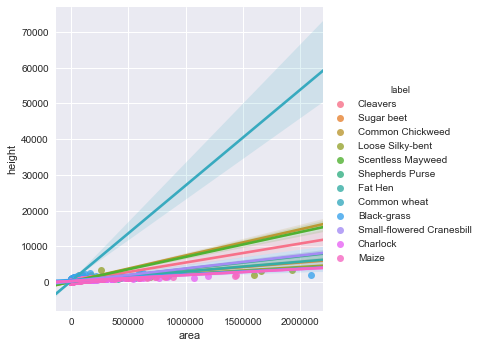

In [31]:
g = sns.lmplot(x="area", y="height", hue="label",
                size=5, data=features_df)

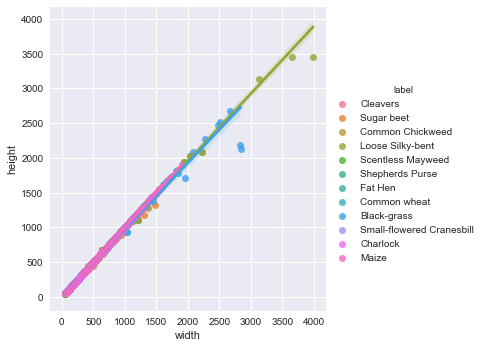

In [32]:
g = sns.lmplot(x="width", y="height", hue="label",
                truncate=True, size=5, data=features_df)

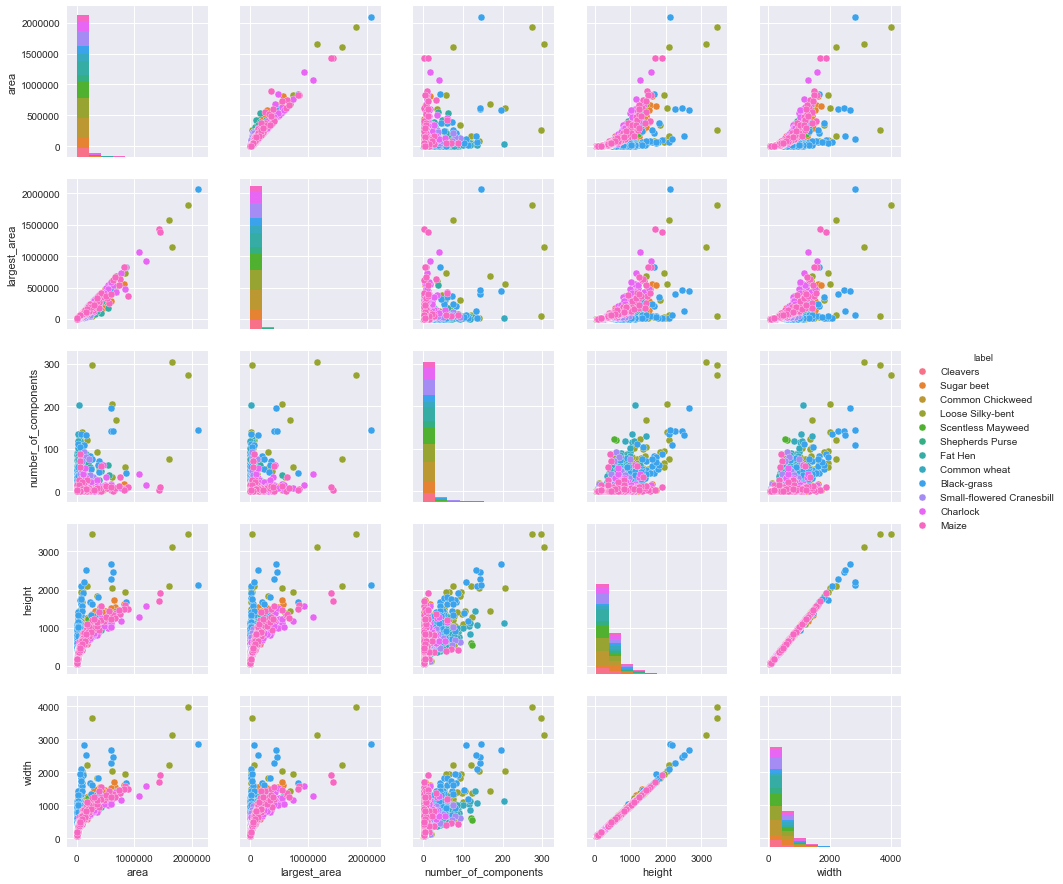

In [33]:
sns.pairplot(features_df, hue="label")

# Data processing for ML 

In [38]:
y_train = features_df.pop("label")

KeyError: 'label'

In [40]:
y_train

0       Cleavers
1       Cleavers
2       Cleavers
3       Cleavers
4       Cleavers
5       Cleavers
6       Cleavers
7       Cleavers
8       Cleavers
9       Cleavers
10      Cleavers
11      Cleavers
12      Cleavers
13      Cleavers
14      Cleavers
15      Cleavers
16      Cleavers
17      Cleavers
18      Cleavers
19      Cleavers
20      Cleavers
21      Cleavers
22      Cleavers
23      Cleavers
24      Cleavers
25      Cleavers
26      Cleavers
27      Cleavers
28      Cleavers
29      Cleavers
          ...   
4720       Maize
4721       Maize
4722       Maize
4723       Maize
4724       Maize
4725       Maize
4726       Maize
4727       Maize
4728       Maize
4729       Maize
4730       Maize
4731       Maize
4732       Maize
4733       Maize
4734       Maize
4735       Maize
4736       Maize
4737       Maize
4738       Maize
4739       Maize
4740       Maize
4741       Maize
4742       Maize
4743       Maize
4744       Maize
4745       Maize
4746       Maize
4747       Mai

In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [42]:
y_train = le.transform(y_train)

In [43]:
y_train

array([2, 2, 2, ..., 7, 7, 7])

In [44]:
le.inverse_transform(y_train)

array(['Cleavers', 'Cleavers', 'Cleavers', ..., 'Maize', 'Maize', 'Maize'], dtype=object)

In [45]:
x_train = features_df

In [46]:
x_test = df.drop("label",1)

# ML from here

In [47]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

/Users/takuyasakaguchi/anaconda/envs/python36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [48]:
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train, y_train, random_state=0)
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.53282828282828287

In [49]:
from sklearn import neighbors
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train,y_train, random_state=0)
x = 3
knn = neighbors.KNeighborsClassifier(n_neighbors=x)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.38552188552188554

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train,y_train, random_state=0)
gbt = GradientBoostingClassifier(max_depth=9, n_estimators=100)
gbt.fit(Xtrain, ytrain)
ypred = gbt.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.51262626262626265

In [52]:
results = clf.predict(x_test)

In [53]:
results

array([ 9,  6,  2,  3,  1,  6,  1,  2,  9,  6,  1,  9,  2,  5,  6,  5,  3,
        6,  6,  3,  3,  3, 10,  8, 10,  0,  3,  1,  6, 10, 10,  6,  2,  6,
        6,  2,  5,  9,  1,  1, 11,  3,  5,  8,  9,  2, 10, 10,  1,  3,  3,
        3,  6,  8,  6,  6,  5,  5,  3,  6,  2,  6,  3,  9, 10,  9,  3,  5,
       10,  5,  1,  6,  1, 11,  3, 10, 11, 10,  6,  5,  5,  1, 10,  1, 11,
        1,  8,  2,  1, 10, 10,  5,  5,  6,  5, 10,  6,  6,  5,  0,  1,  6,
        3,  6, 10,  3,  3,  1,  3,  1,  3,  8,  3,  5,  2,  1,  6,  1,  6,
        6,  5,  9,  1,  3,  6,  1,  2,  1,  3,  1,  3,  2,  9,  6,  9,  5,
        5,  0,  6,  3,  3,  3,  3,  3,  1,  8,  5,  2, 10,  5,  9,  5,  5,
        1,  6,  5,  2,  6,  1, 10,  1,  5, 11,  5,  6,  0,  0,  2,  5,  2,
        1,  5,  3,  3,  1,  1,  9,  6,  3,  5,  6, 10,  1,  9,  6, 10, 10,
        3,  6,  5, 10,  2,  6,  3, 11, 11,  2,  6,  6,  3, 10,  1,  1, 10,
       10,  3,  1,  9,  9,  1,  3,  3,  5, 10,  3,  3, 11, 11,  3,  5,  6,
        6,  5,  5,  3,  5

In [54]:
results = le.inverse_transform(results)

In [55]:
results

array(['Shepherds Purse', 'Loose Silky-bent', 'Cleavers',
       'Common Chickweed', 'Charlock', 'Loose Silky-bent', 'Charlock',
       'Cleavers', 'Shepherds Purse', 'Loose Silky-bent', 'Charlock',
       'Shepherds Purse', 'Cleavers', 'Fat Hen', 'Loose Silky-bent',
       'Fat Hen', 'Common Chickweed', 'Loose Silky-bent',
       'Loose Silky-bent', 'Common Chickweed', 'Common Chickweed',
       'Common Chickweed', 'Small-flowered Cranesbill',
       'Scentless Mayweed', 'Small-flowered Cranesbill', 'Black-grass',
       'Common Chickweed', 'Charlock', 'Loose Silky-bent',
       'Small-flowered Cranesbill', 'Small-flowered Cranesbill',
       'Loose Silky-bent', 'Cleavers', 'Loose Silky-bent',
       'Loose Silky-bent', 'Cleavers', 'Fat Hen', 'Shepherds Purse',
       'Charlock', 'Charlock', 'Sugar beet', 'Common Chickweed', 'Fat Hen',
       'Scentless Mayweed', 'Shepherds Purse', 'Cleavers',
       'Small-flowered Cranesbill', 'Small-flowered Cranesbill',
       'Charlock', 'Common 

In [56]:
df_submission = pd.read_csv('sample_submission-5.csv')

In [57]:
df_submission.head()

,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet


In [58]:
df['species']=results

In [59]:
df.head()

,label,area,largest_area,number_of_components,height,width,species
0,1b490196c.png,21918.5,21918.5,1,289,289,Shepherds Purse
1,85431c075.png,2532.0,1502.0,4,271,271,Loose Silky-bent
2,506347cfe.png,14087.5,14087.5,1,237,237,Cleavers
3,7f46a71db.png,8894.5,8894.5,1,244,244,Common Chickweed
4,668c1007c.png,47178.0,47178.0,1,343,343,Charlock


In [60]:
df.sort_values('label')

,label,area,largest_area,number_of_components,height,width,species
35,0021e90e4.png,13999.0,7189.0,3,270,270,Cleavers
56,003d61042.png,5674.5,3278.0,3,253,253,Fat Hen
135,007b3da8b.png,8349.5,4397.0,2,288,288,Fat Hen
217,0086a6340.png,6040.0,6040.0,2,214,214,Sugar beet
389,00c47e980.png,10819.0,10819.0,1,313,313,Sugar beet
418,00d090cde.png,3108.0,3108.0,1,283,283,Black-grass
523,00ef713a8.png,8072.5,8072.5,1,259,259,Common Chickweed
549,01291174f.png,3493.5,1945.5,2,204,204,Fat Hen
54,026716f9b.png,561.5,561.5,5,231,231,Loose Silky-bent
164,02cfeb38d.png,1266.5,1266.5,1,269,269,Loose Silky-bent


In [61]:
df = df.sort_values('label')

In [62]:
df.head()

,label,area,largest_area,number_of_components,height,width,species
35,0021e90e4.png,13999.0,7189.0,3,270,270,Cleavers
56,003d61042.png,5674.5,3278.0,3,253,253,Fat Hen
135,007b3da8b.png,8349.5,4397.0,2,288,288,Fat Hen
217,0086a6340.png,6040.0,6040.0,2,214,214,Sugar beet
389,00c47e980.png,10819.0,10819.0,1,313,313,Sugar beet


In [63]:
df = df.reset_index(drop=True)

In [64]:
df.head()

,label,area,largest_area,number_of_components,height,width,species
0,0021e90e4.png,13999.0,7189.0,3,270,270,Cleavers
1,003d61042.png,5674.5,3278.0,3,253,253,Fat Hen
2,007b3da8b.png,8349.5,4397.0,2,288,288,Fat Hen
3,0086a6340.png,6040.0,6040.0,2,214,214,Sugar beet
4,00c47e980.png,10819.0,10819.0,1,313,313,Sugar beet


In [65]:
df_submission.head()

,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet


In [66]:
df_submission.species = df.species

In [67]:
df_submission.head()

,file,species
0,0021e90e4.png,Cleavers
1,003d61042.png,Fat Hen
2,007b3da8b.png,Fat Hen
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet


In [68]:
df_submission.to_csv('first_submission2.csv', index = False)